<a href="https://colab.research.google.com/github/Levelearn/data-analysis/blob/main/qualitative_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Importing necessary libraries
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Memuat file dataset kualitatif yang di-upload
file_path_qualitative = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'
df_qualitative = pd.read_csv(file_path_qualitative, encoding="latin-1", sep=";")

# Menampilkan beberapa baris pertama dataset untuk memastikan isinya
df_qualitative[['Qualitative_Q1', 'Qualitative_Q2', 'Qualitative_Q3', 'Qualitative_Q4']].head()


,Qualitative_Q1,Qualitative_Q2,Qualitative_Q3,Qualitative_Q4
0,Leaderboard,Tidak,Tidak,Lebih seru dan menarik
1,Point\n\nKarena pointnya dapat ditukarkan dan ...,Tidak,Tidak,Gamifikasi meningkatkan kualitas belajar saya
2,Progress bar,Tidak,Tidak ada sejauh ini,Sama aja
3,Leaderboard,tidak,tidak ada,"lebih seru, dan jadi berpacu untuk belajar"
4,"Point, karena ingin menukar nya dengan hadiah",Tidak,Tidak,Sebelum ada fitur gamifikasi tidak ada niatan ...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Qualitative_Q1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Qualitative_Q2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Qualitative_Q3').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Qualitative_Q4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Qualitative_Q2'].value_counts()
    for x_label, grp in _df_4.groupby('Qualitative_Q1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Qualitative_Q1')
_ = plt.ylabel('Qualitative_Q2')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Qualitative_Q3'].value_counts()
    for x_label, grp in _df_5.groupby('Qualitative_Q2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Qualitative_Q2')
_ = plt.ylabel('Qualitative_Q3')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Qualitative_Q4'].value_counts()
    for x_label, grp in _df_6.groupby('Qualitative_Q3')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Qualitative_Q3')
_ = plt.ylabel('Qualitative_Q4')

In [2]:
# Fungsi untuk membuat Word Cloud dari kolom kualitatif
def generate_word_cloud(text_data, title):
    # Membuat Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_data))

    # Visualisasi Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [3]:
# Fungsi untuk melakukan Sentiment Analysis menggunakan TextBlob
def analyze_sentiment(text_data):
    sentiment_scores = []
    for text in text_data:
        # Menghitung sentimen (positif, negatif, netral)
        analysis = TextBlob(str(text))
        polarity = analysis.sentiment.polarity
        sentiment_scores.append(polarity)

    # Menghitung rata-rata sentimen
    avg_sentiment = np.mean(sentiment_scores)
    return avg_sentiment

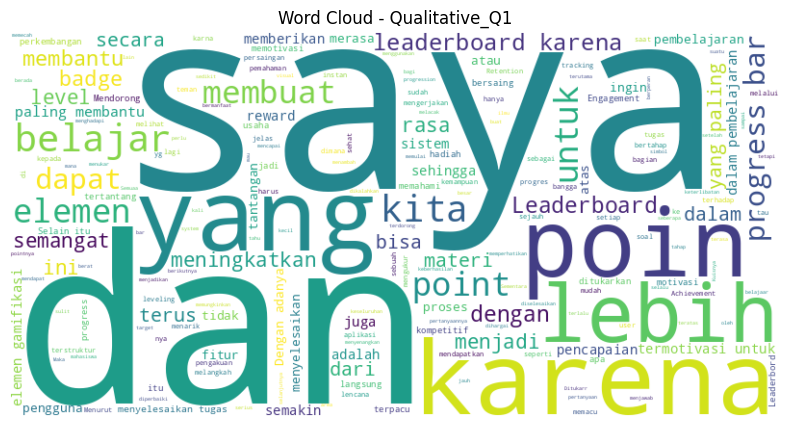

Average Sentiment for Qualitative_Q1: 0.009259259259259259


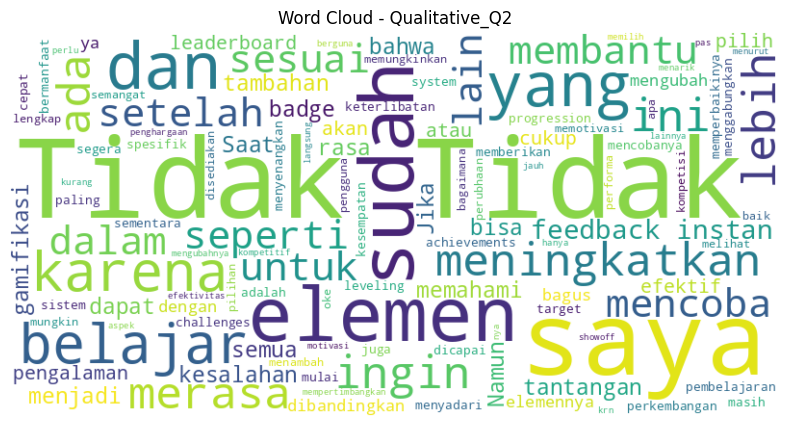

Average Sentiment for Qualitative_Q2: 0.0


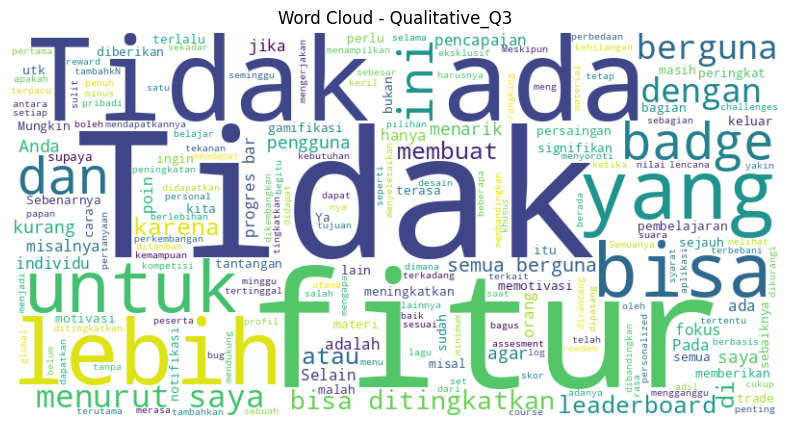

Average Sentiment for Qualitative_Q3: -0.001851851851851852


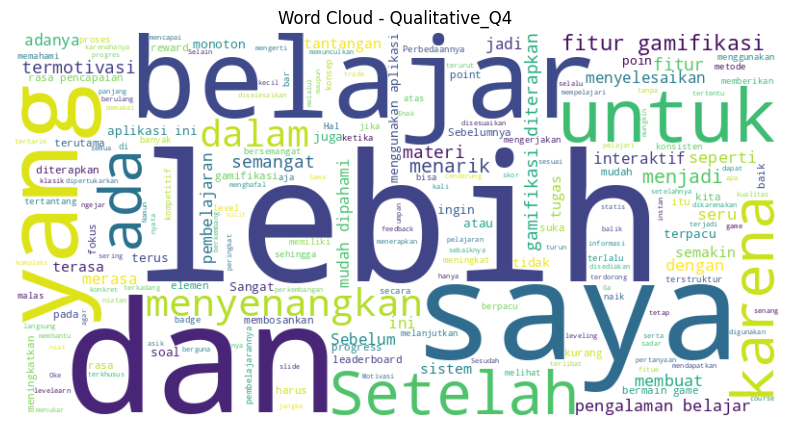

Average Sentiment for Qualitative_Q4: -0.01697530864197531


In [11]:
# Analisis untuk setiap kolom kualitatif
questions = ['Qualitative_Q1', 'Qualitative_Q2', 'Qualitative_Q3', 'Qualitative_Q4']
for question in questions:
    # 1. Membuat Word Cloud untuk setiap kolom
    generate_word_cloud(df_qualitative[question].dropna(), f'Word Cloud - {question}')

    # 2. Melakukan Sentiment Analysis untuk setiap kolom
    avg_sentiment = analyze_sentiment(df_qualitative[question].dropna())
    print(f'Average Sentiment for {question}: {avg_sentiment}')